<a href="https://colab.research.google.com/github/benyanko/DeepLearningAndAI/blob/main/RNN_NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Spam Detection with LSTMs**
Detecting Spam Messages and text Classification with LSTMs

In [1]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Dense, Input, GlobalMaxPooling1D
from tensorflow.keras.layers import LSTM, Embedding
from tensorflow.keras.models import Model

# Load Data

In [2]:
!wget -nc https://lazyprogrammer.me/course_files/spam.csv

--2021-02-24 19:25:11--  https://lazyprogrammer.me/course_files/spam.csv
Resolving lazyprogrammer.me (lazyprogrammer.me)... 104.21.23.210, 172.67.213.166, 2606:4700:3031::6815:17d2, ...
Connecting to lazyprogrammer.me (lazyprogrammer.me)|104.21.23.210|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 503663 (492K) [text/csv]
Saving to: ‘spam.csv’

spam.csv            100%[===================>] 491.86K   845KB/s    in 0.6s    

2021-02-24 19:25:13 (845 KB/s) - ‘spam.csv’ saved [503663/503663]



In [3]:
df = pd.read_csv('spam.csv', encoding='ISO-8859-1')

# drop unnecessary columns
df = df.drop(["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], axis=1)

# rename columns to something better
df.columns = ['labels', 'data']

# create binary labels
df['b_labels'] = df['labels'].map({'ham': 0, 'spam': 1})
Y = df['b_labels'].values

# split up the data
df_train, df_test, Ytrain, Ytest = train_test_split(df['data'], Y, test_size=0.33)

# Convert sentences to sequences


In [4]:
# Max vocab size - the max size of words we save in our tokenizer
# Tokenizer - convert string into list of tokens, and convert list of tokens into list of integers

MAX_VOCAB_SIZE = 20000
tokenizer = Tokenizer(num_words=MAX_VOCAB_SIZE)
tokenizer.fit_on_texts(df_train)
sequences_train = tokenizer.texts_to_sequences(df_train)
sequences_test = tokenizer.texts_to_sequences(df_test)

In [5]:
# get word -> integer mapping
word2idx = tokenizer.word_index
V = len(word2idx)

In [6]:
# Pad sequences - fit all sequences to same len.
# pad sequences so that we get a N x T matrix
data_train = pad_sequences(sequences_train)

# get sequence length
T = data_train.shape[1]

data_test = pad_sequences(sequences_test, maxlen=T)

# Build The Model

In [7]:

# We get to choose embedding dimensionality
D = 20

# Hidden state dimensionality
M = 15

# Embeding layer - maps sequence of integer into sequence of word vector.
# The size of the embedding is (V + 1) x D, because the first index starts from 1 and not 0.
# LSTM layer - return_sequences: return the full sequence.
# GlobalMaxPooling1D layer - Downsamples the input representation by taking the maximum value over the time dimension
# Dense layer - with 1 unit, activation 'sgmoid'.


i = Input(shape=(T,))
x = Embedding(V + 1, D)(i)
x = LSTM(M, return_sequences=True)(x)
x = GlobalMaxPooling1D()(x)
x = Dense(1, activation='sigmoid')(x)

model = Model(i, x)


# Compile The Model

In [8]:
# Compile defines the loss function, the optimizer and the metrics.
# Adam optimization is a stochastic gradient descent method.
# Cost func is binary_crossentropy because we using Sigmoid.
# Metric functions is accuracy which calculates how often predictions equal labels

model.compile(
  optimizer='adam',
  loss='binary_crossentropy',
  metrics=['accuracy']
)

#Train The Model

In [9]:
# Train data - data_train, Ytrain
# Validation data - data_test, Ytest
# epochs=10 - "one pass over the entire dataset", used to separate training into distinct phases

r = model.fit(
  data_train,
  Ytrain,
  epochs=10,
  validation_data=(data_test, Ytest)
)

Epoch 1/10
117/117 [==============================] - 9s 59ms/step - loss: 0.5607 - accuracy: 0.8640 - val_loss: 0.4058 - val_accuracy: 0.8592
Epoch 2/10
117/117 [==============================] - 6s 51ms/step - loss: 0.3867 - accuracy: 0.8694 - val_loss: 0.4036 - val_accuracy: 0.8592
Epoch 3/10
117/117 [==============================] - 6s 51ms/step - loss: 0.3783 - accuracy: 0.8717 - val_loss: 0.3814 - val_accuracy: 0.8592
Epoch 4/10
117/117 [==============================] - 6s 51ms/step - loss: 0.3538 - accuracy: 0.8667 - val_loss: 0.3343 - val_accuracy: 0.8592
Epoch 5/10
117/117 [==============================] - 6s 50ms/step - loss: 0.2878 - accuracy: 0.8736 - val_loss: 0.1849 - val_accuracy: 0.9685
Epoch 6/10
117/117 [==============================] - 6s 50ms/step - loss: 0.1211 - accuracy: 0.9858 - val_loss: 0.1047 - val_accuracy: 0.9788
Epoch 7/10
117/117 [==============================] - 6s 51ms/step - loss: 0.0488 - accuracy: 0.9953 - val_loss: 0.0764 - val_accuracy: 0.9799

# Plots

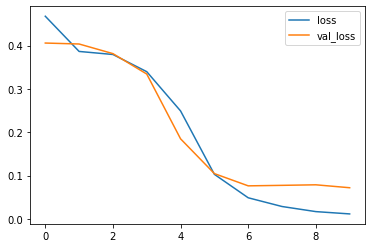

In [10]:
# Plot loss per iteration
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

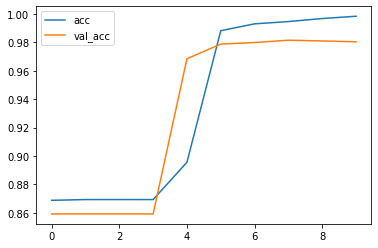

In [11]:
# Plot accuracy per iteration
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()